In [ ]:
%cd /content/drive/MyDrive/DL_hw1

/content/drive/MyDrive/DL_hw1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
def load_data():
    """
    Load the mashroom dataset from disk.

    Returns
    -------
    X_train : np.ndarray
        A numpy array containing the features of the trainin set of the
        mashroom dataset.
    X_test : np.ndarray
        A numpy array containing the features of the test set of the
        mashroom dataset.
    y_train : np.ndarray
        A numpy array containing the training labels of the mashroom dataset.
    y_test : np.ndarray
        A numpy array containing the test labels of the mashroom dataset.
    """
    # YOUR CODE HERE
    X_train = np.load('/content/drive/MyDrive/DL_hw1/homework-1-Debss18-main/data/X_train.npy')
    X_test = np.load('/content/drive/MyDrive/DL_hw1/homework-1-Debss18-main/data/X_test.npy')
    y_train = np.load('/content/drive/MyDrive/DL_hw1/homework-1-Debss18-main/data/y_train.npy')
    y_test = np.load('/content/drive/MyDrive/DL_hw1/homework-1-Debss18-main/data/y_test.npy')
    # Hint: use np.load

    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = load_data()

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) # check data dimensions X.shape==(samples, features)

(5760, 115) (640, 115) (5760,) (640,)


In [ ]:
def split_data(X, y, train_size=0.9, val_size=0.1):
    """
    Splits the input data into training and validation according
    to the given percentages.

    Parameters
    ----------
    X : np.ndarray
        The input features to be split.
    y : np.ndarray
        The input labels to be split.
    train_size : float, optional
        The proportion of data to be used for training, by default 0.9.
    val_size : float, optional
        The proportion of data to be used for validation, by default 0.1.

    Returns
    -------
    X_train : np.ndarray
        The input features to be used for training.
    X_val : np.ndarray
        The input features to be used for validation.
    y_train : np.ndarray
        The input labels to be used for training.
    y_val : np.ndarray
        The input labels to be used for validation.
    """
    # YOUR CODE HERE
    X_train = X[:int(X.shape[0]*train_size),]
    y_train = y[:int(y.shape[0]*train_size),]
    X_val = X[-int(np.round(X.shape[0]*val_size)):,]
    y_val = y[-int(np.round(y.shape[0]*val_size)):,]

    # Calculate the size of training and validation sets given the percentages
    pass

    return X_train, X_val, y_train, y_val

In [ ]:
X_train, X_val, y_train, y_val = split_data(X = X_train, y = y_train)

In [ ]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(5184, 115) (576, 115) (5184,) (576,)


In [ ]:
def build_baseline(input_shape):
  """
  Build a binary classification baseline using Dense layers.

  Parameters
  ----------
  input_shape : int
      The shape of the input data. This should be an integer
      specifying the number of features in the input data (e.g. 200).

  Returns
  -------
  baseline : keras.models.Sequential
      A Keras sequential model object representing the built model.
      The model architecture should consist of at least two Dense layers with
      appropriate sizes and activations, followed by an output layer with a
      single unit and sigmoid activation function. The model should be
      compiled with the binary cross-entropy loss function, an adam optimizer,
      and the accuracy metric.
  """
  # YOUR CODE HERE
  model = keras.Sequential([
        keras.layers.Dense(512, input_shape =(input_shape,), activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
  model.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=['accuracy'])
  return model



In [ ]:
baseline = build_baseline(X_train.shape[1])


In [ ]:
def train_model(model, X_train, y_train, epochs=10, batch_size=32, \
                class_weights=None, X_val=None, y_val=None):
    """
    Train a given Keras model using the provided training data. Use the
    validation data to monitor the model during training.

    Parameters
    ----------
    model : keras.Sequential
        The Keras model to be trained.
    X_train : np.ndarray
        The input features for training the model.
    y_train : np.ndarray
        The target values for training the model.
    epochs : int, optional
        The number of epochs to train the model for. Default is 10.
    batch_size : int, optional
        The batch size to use during training. Default is 32.
    class_weights : dict, optional
        A dictionary containing class weights to be applied to the loss function
        during training to balance the data. Default is None.
    X_val : np.ndarray, optional
        The input features for validating the model.
    y_val : np.ndarray, optional
        The target values for validating the model.

    Returns
    -------
    model : keras.Sequential
        The trained Keras model.
    history : keras.callbacks.History
        The training history of the model.
    """
    # YOUR CODE HERE
    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_val, y_val))

    return model, history


In [ ]:
model, history = train_model(baseline, X_train, y_train,
                    epochs=10,
                    class_weights=None,
                    X_val=X_val, y_val=y_val)

Epoch 1/10
162/162 [==============================] - 2s 8ms/step - loss: 0.4065 - accuracy: 0.7398 - val_loss: 0.3630 - val_accuracy: 0.7326
Epoch 2/10
162/162 [==============================] - 1s 7ms/step - loss: 0.3485 - accuracy: 0.7797 - val_loss: 0.3892 - val_accuracy: 0.7431
Epoch 3/10
162/162 [==============================] - 1s 7ms/step - loss: 0.3298 - accuracy: 0.8067 - val_loss: 0.3670 - val_accuracy: 0.7274
Epoch 4/10
162/162 [==============================] - 1s 6ms/step - loss: 0.3055 - accuracy: 0.8349 - val_loss: 0.4134 - val_accuracy: 0.7431
Epoch 5/10
162/162 [==============================] - 1s 4ms/step - loss: 0.2567 - accuracy: 0.8740 - val_loss: 0.4098 - val_accuracy: 0.7552
Epoch 6/10
162/162 [==============================] - 1s 4ms/step - loss: 0.1964 - accuracy: 0.9151 - val_loss: 0.4681 - val_accuracy: 0.7656
Epoch 7/10
162/162 [==============================] - 1s 4ms/step - loss: 0.1257 - accuracy: 0.9495 - val_loss: 0.5424 - val_accuracy: 0.7691
Epoch 

In [ ]:
def plot_loss(history):
  """
  Plot the training and validation loss and accuracy.

  Parameters
  ----------
  history : keras.callbacks.History
      The history object returned by the `fit` method of a Keras model.

  Returns
  -------
  None
  """

  # Plot the training and validation loss side by side
  fig, ax = plt.subplots(1, 2, figsize=(10, 5))

  # Plot the training and validation loss
  ax[0].plot(history.history['loss'], label='train')
  ax[0].plot(history.history['val_loss'], label='val')
  ax[0].set_xlabel('Epoch')
  ax[0].set_ylabel('Loss')
  ax[0].legend()

  # Plot the training and validation accuracy
  ax[1].plot(history.history['accuracy'], label='train')
  ax[1].plot(history.history['val_accuracy'], label='val')
  ax[1].set_xlabel('Epoch')
  ax[1].set_ylabel('Accuracy')
  ax[1].legend()

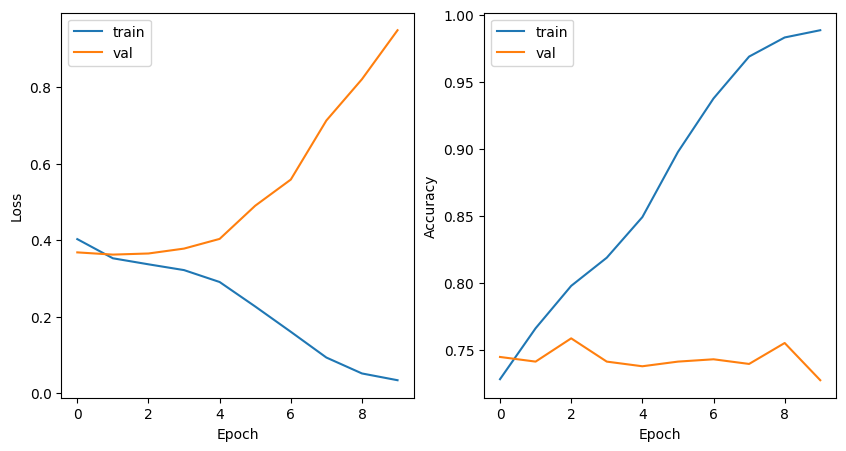

In [ ]:
plot_loss(history)

In [ ]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluate a trained model on a test set and return the accuracy of the model.

    Parameters
    ----------
    model : keras.models.Model
        The trained Keras model to evaluate.
    X_test : numpy.ndarray
        The test set features as a numpy array.
    y_test : numpy.ndarray
        The test set labels as a numpy array.

    Returns
    -------
    accuracy : float
        The accuracy of the model on the test set as a percentage.
    """
    # YOUR CODE HERE
    # Evaluate model
    #test_loss, test_acc = model.predict(X_test, verbose=2)
    #print(test_acc)

    y_pred = np.argmax(model.predict(X_test), axis=1)
    acc = np.mean(y_pred==y_test)
    return acc

In [ ]:
evaluate_model(baseline, X_test, y_test)

20/20 [==============================] - 0s 2ms/step


0.7046875

In [ ]:
def classify_mushrooms(model, mushroom_features):
  """
  Classify mushrooms as poisonous or edible based on the given features. This
  function is meant to be used in individual or few samples in practice.

  Parameters
  ----------
  model : keras.engine.training.Model
      The trained model to use for classification.
  mushroom_features : np.ndarray
      A numpy array containing the features of the mushrooms to classify.

  Returns
  -------
  np.ndarray
      A numpy array containing the predicted labels (0 for edible,
      1 for poisonous) for the given mushrooms.
  """
  # YOUR CODE HERE
  # Classify mushrooms
  y_pred = model.predict(mushroom_features)
  y_pred = np.squeeze(np.round(y_pred), axis=1)
  # Hint: same idea as the evaluation function but you return the predictions
  return y_pred

In [ ]:
y_pred = np.squeeze(np.round(y_pred), axis=1)

NameError: name 'y_pred' is not defined

In [ ]:
from sklearn.metrics import classification_report

idx = np.random.randint(0, len(y_test), size=1)[0]
mushroom_features = X_test[idx][np.newaxis, :]
print('This mushroom is labeled as edible.' if y_test[idx]==0 else
      'This mushroom is labeled as poisonous.')

# Use your model to make predictions
y_pred = classify_mushrooms(baseline, mushroom_features)

if y_pred[0] == 1:
    print('Your prediction says the mushroom is poisonous!')
else:
    print('Your prediction says the mushroom is edible!')
#print(idx, X_test[idx])

This mushroom is labeled as poisonous.
1/1 [==============================] - 0s 66ms/step
Your prediction says the mushroom is poisonous!


In [ ]:

def build_model(input_shape):
  """
  Build a binary classification model using Dense layers. This model should
  achieve over 90% recall in poisonous mushrooms, and over 90% of precision in
  edible mushrooms.

  Parameters
  ----------
  input_shape : tuple
      The shape of the input data. This should be a tuple of integers
      specifying the number of features in the input data (e.g. (200,)).

  Returns
  -------
  model : keras.models.Sequential
      A Keras sequential model object representing the built model.
      The model architecture should consist of at least two Dense layers with
      appropriate sizes and activations, followed by an output layer with a
      single unit and sigmoid activation function. The model should be
      compiled with the binary cross-entropy loss function, an adam optimizer,
      and the accuracy metric.
  """
  model = keras.Sequential([
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid')
    ])
  model.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=['accuracy'])
  return model

In [ ]:
model = build_model(X_train.shape[1])

In [ ]:
class_weights = {0: 1, # edible class
                 1: 3} # poisonous class

model, history = train_model(model, X_train, y_train,
                    epochs=10,
                    class_weights=class_weights,
                    X_val=X_val, y_val=y_val)

Epoch 1/10
162/162 [==============================] - 2s 5ms/step - loss: 0.5117 - accuracy: 0.7024 - val_loss: 0.3936 - val_accuracy: 0.7205
Epoch 2/10
162/162 [==============================] - 1s 3ms/step - loss: 0.4030 - accuracy: 0.7270 - val_loss: 0.3848 - val_accuracy: 0.7396
Epoch 3/10
162/162 [==============================] - 1s 5ms/step - loss: 0.3828 - accuracy: 0.7290 - val_loss: 0.3798 - val_accuracy: 0.7448
Epoch 4/10
162/162 [==============================] - 1s 5ms/step - loss: 0.3777 - accuracy: 0.7432 - val_loss: 0.3773 - val_accuracy: 0.7465
Epoch 5/10
162/162 [==============================] - 1s 5ms/step - loss: 0.3767 - accuracy: 0.7481 - val_loss: 0.3745 - val_accuracy: 0.7431
Epoch 6/10
162/162 [==============================] - 1s 5ms/step - loss: 0.3728 - accuracy: 0.7477 - val_loss: 0.3731 - val_accuracy: 0.7465
Epoch 7/10
162/162 [==============================] - 1s 5ms/step - loss: 0.3677 - accuracy: 0.7504 - val_loss: 0.3691 - val_accuracy: 0.7465
Epoch 

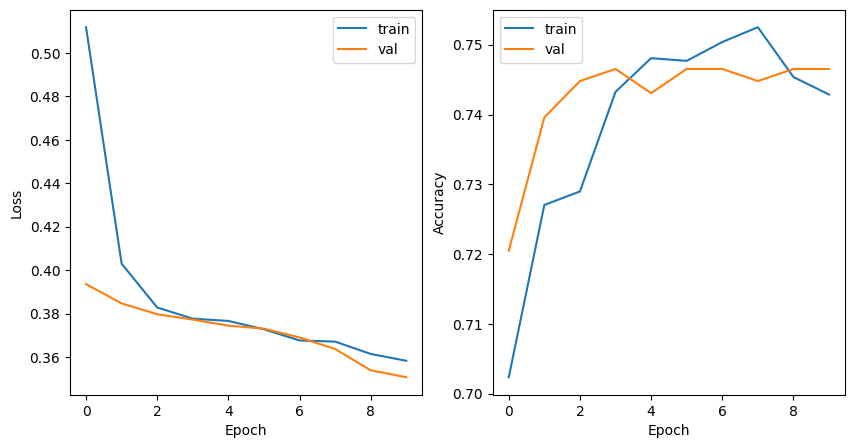

In [ ]:
plot_loss(history)

In [ ]:
evaluate_model(model, X_test, y_test)

20/20 [==============================] - 0s 2ms/step


0.7046875

In [ ]:
y_pred = classify_mushrooms(model, X_test)

# Compute classification report
target_names = ['edible', 'poisonous']
report = classification_report(list(y_test),
                               list(y_pred),
                               target_names=target_names)

print(report)

20/20 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

      edible       1.00      0.64      0.78       451
   poisonous       0.54      1.00      0.70       189

    accuracy                           0.75       640
   macro avg       0.77      0.82      0.74       640
weighted avg       0.86      0.75      0.76       640



In [ ]:
np.save('/content/drive/MyDrive/mushroom_y_pred.npy', y_pred)

In [ ]:
# Auxiliary functions below =====================================

def explore_data(X_train, y_train, y_test, y_val):
  """
  Plots the distribution of classes in the training, validation, and test sets.

  Parameters
  ----------
  X_train : np.ndarray
      A numpy array containing the features of the training set.
  y_train : np.ndarray
      A numpy array containing the labels of the training set.
  y_test : np.ndarray
      A numpy array containing the labels of the test set.
  y_val : np.ndarray
      A numpy array containing the labels of the validation set.

  Returns
  -------
  None
  """

  # Class names
  class_names = ['edible', 'poisonous']

  # Plot the distribution of classes in the training, validation, and test sets
  fig, ax = plt.subplots(1, 3, figsize=(10, 5))

  # Plot the distribution of classes in the training set
  train_class_counts = np.bincount(y_train)
  ax[0].bar(range(len(class_names)), train_class_counts)
  ax[0].set_xticks(range(len(class_names)))
  ax[0].set_xticklabels(class_names, rotation=45)
  ax[0].set_title('Training set')

  # Plot the distribution of classes in the test set
  test_class_counts = np.bincount(y_val)
  ax[1].bar(range(len(class_names)), test_class_counts)
  ax[1].set_xticks(range(len(class_names)))
  ax[1].set_xticklabels(class_names, rotation=45)
  ax[1].set_title('Val set')

  # Plot the distribution of classes in the test set
  test_class_counts = np.bincount(y_test)
  ax[2].bar(range(len(class_names)), test_class_counts)
  ax[2].set_xticks(range(len(class_names)))
  ax[2].set_xticklabels(class_names, rotation=45)
  ax[2].set_title('Test set')

  plt.show()

In [ ]:
def plot_loss(history):
  """
  Plot the training and validation loss and accuracy.

  Parameters
  ----------
  history : keras.callbacks.History
      The history object returned by the `fit` method of a Keras model.

  Returns
  -------
  None
  """

  # Plot the training and validation loss side by side
  fig, ax = plt.subplots(1, 2, figsize=(10, 5))

  # Plot the training and validation loss
  ax[0].plot(history.history['loss'], label='train')
  ax[0].plot(history.history['val_loss'], label='val')
  ax[0].set_xlabel('Epoch')
  ax[0].set_ylabel('Loss')
  ax[0].legend()

  # Plot the training and validation accuracy
  ax[1].plot(history.history['accuracy'], label='train')
  ax[1].plot(history.history['val_accuracy'], label='val')
  ax[1].set_xlabel('Epoch')
  ax[1].set_ylabel('Accuracy')
  ax[1].legend()